In [249]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/grantnav-20180427213910.csv")

/home/pablo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [296]:
# TODO 20-29 are incomplete location/city names and codes... can just parse myself from the postal code

In [297]:
data.Identifier[:2]

0    360G-SE-20090067LOTT
1    360G-SE-20075892LOTT
Name: Identifier, dtype: object

In [298]:
data.Title[:2]

0    MEVAGISSEY ACTIVITY CENTRE MARKETING PLANS
1         Community Coach SE2 WASP5 application
Name: Title, dtype: object

In [299]:
data.Description[:2]

0    Funding under Sport England's Community Progra...
1    Funding under Sport England's Community Progra...
Name: Description, dtype: object

In [300]:
data.Currency.value_counts() # TODO: convert EUR to GBP

GBP    13524
EUR        1
Name: Currency, dtype: int64

In [301]:
data["Amount Applied For"].value_counts().head(2) # TODO: rename all space columns

500.0     64
5000.0    44
Name: Amount Applied For, dtype: int64

In [302]:
data["Amount Awarded"].value_counts().head(10)

10000.0    1165
50000.0     513
5000.0      238
0.0         186
2000.0      173
1000.0      146
3000.0      145
30000.0     131
500.0       117
2500.0       93
Name: Amount Awarded, dtype: int64

In [303]:
data.columns
#data.Identifier.value_counts() seem like unique Ids? maybe can drop those

Index(['Identifier', 'Title', 'Description', 'Currency', 'Amount Applied For',
       'Amount Awarded', 'Amount Disbursed', 'Award Date', 'URL',
       'Planned Dates:Start Date', 'Planned Dates:End Date',
       'Planned Dates:Duration (months)', 'Actual Dates:Start Date',
       'Actual Dates:End Date', 'Actual Dates:Duration (months)',
       'Recipient Org:Identifier', 'Recipient Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code',
       'Recipient Org:Location:0:Geographic Code Type',
       'Recipient Org:Location:0:Geographic Code',
       'Recipient Org:Location:0:Name',
       'Recipient Org:Location:1:Geographic Code Type',
       'Recipient Org:Location:1:Geographic Code',
       'Recipient Org:Location:1:Name',
       'Recipient Org:Location:2:Geographic Code Type',
       'Recipient Org:Location:2:Geographic Code',
       'Recipient Org:Location:2:Name', 'Funding Org:Identifier',
       'Funding Org:Name', '

In [317]:
banlist = np.concatenate([
    data.columns[[0]],
    data.columns[data.columns.isin(data.columns[20: 29])],
    data.columns[data.columns.isin(data.columns[35: 67])],
    data.columns[[-8]],
    data.columns[-7:-3],
    data.columns[-3:],
    data.columns[-11:-9]
])

In [318]:
data = data[data.columns[~data.columns.isin(banlist)]]

In [319]:
data.head(1)

,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,Planned Dates:End Date,...,Recipient Org:Company Number,Recipient Org:Postal Code,Funding Org:Identifier,Funding Org:Name,Funding Org:Postal Code,Grant Programme:Code,Grant Programme:Title,Grant Programme:URL,From An Open Call?,Publisher:Name
0,MEVAGISSEY ACTIVITY CENTRE MARKETING PLANS,Funding under Sport England's Community Progra...,GBP,NaN,27950.0,27950.0,2009-04-08T00:00:00+00:00,NaN,2009-04-01T00:00:00+00:00,2011-03-31T00:00:00+00:00,...,05464886,PL26 6SA,GB-COH-RC000766,Sport England,NaN,CP,Community Programme,http://www.sportengland.org/funding,Yes,Sport England


In [320]:
len(data)

13525

In [321]:
data.columns

Index(['Title', 'Description', 'Currency', 'Amount Applied For',
       'Amount Awarded', 'Amount Disbursed', 'Award Date', 'URL',
       'Planned Dates:Start Date', 'Planned Dates:End Date',
       'Planned Dates:Duration (months)', 'Actual Dates:Start Date',
       'Actual Dates:End Date', 'Actual Dates:Duration (months)',
       'Recipient Org:Identifier', 'Recipient Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code', 'Funding Org:Identifier',
       'Funding Org:Name', 'Funding Org:Postal Code', 'Grant Programme:Code',
       'Grant Programme:Title', 'Grant Programme:URL', 'From An Open Call?',
       'Publisher:Name'],
      dtype='object')

In [322]:
data["Actual Dates:Duration (months)"].value_counts()

Series([], Name: Actual Dates:Duration (months), dtype: int64)

In [327]:
data[data["Planned Dates:Duration (months)"] < 0].iloc[0]

Title                                                         Welcome to Brooksville
Description                        For new marketing materials to help the charit...
Currency                                                                         GBP
Amount Applied For                                                              5000
Amount Awarded                                                                  1000
Amount Disbursed                                                                 NaN
Award Date                                                 2016-06-23T00:00:00+00:00
URL                                                 http://www.southernbrooks.org.uk
Planned Dates:Start Date                                   2016-07-01T00:00:00+00:00
Planned Dates:End Date                                     2016-01-30T00:00:00+00:00
Planned Dates:Duration (months)                                                   -6
Actual Dates:Start Date                                          

In [205]:
data["Planned Dates:Duration (months)"].describe()

count    11071.000000
mean        14.193569
std         10.728750
min         -6.000000
25%         11.000000
50%         12.000000
75%         12.000000
max        169.000000
Name: Planned Dates:Duration (months), dtype: float64

In [204]:
data["Planned Dates:Duration (months)"].value_counts().head()

12.0    6090
36.0     700
11.0     373
3.0      314
6.0      287
Name: Planned Dates:Duration (months), dtype: int64

In [181]:
data.Title.value_counts().head(10)

English Community Transport 2016/17                         693
Bus Service Operator Grants (outside London) 2016/17        293
Primary Spaces                                              165
Emergency Flood Relief                                      116
Supported Contact                                           114
Youth Justice (YOT) Grant                                    98
Bus Service Operator Grants to Local Authorities 2016/17     95
College Sport Makers                                         83
Home Chargers                                                72
Highways Maintenance Block 2016/17                           57
Name: Title, dtype: int64

In [184]:
data.Description.value_counts().head(3) # TODO: Need to clean this up

Placeholder                                                                                                                                                                                                                                                                                           1316
Funding under Sport England's Primary Spaces funding programme for a Capital project titled 'Primary Spaces'. This project is a Sport participation and capacity building project, with a focus on younger beneficiaries. This funding has contributed towards a MUGA - MUGA (Informal Recreation)     163
Grant allocated to local authorities for the purpose of the operation of the youth justice system and the provision of youth justice services                                                                                                                                                          151
Name: Description, dtype: int64

In [95]:
top10grantps = data["Grant Programme:Title"].value_counts().head(10)

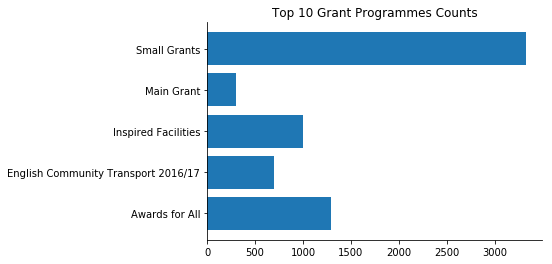

In [97]:
plt.barh(top5grantps.index, top5grantps.values)
plt.title("Top 10 Grant Programmes Counts")

sns.despine()

Text(0.5,1,'Amount applied for (log10 scale)')

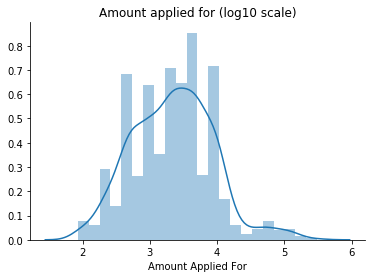

In [117]:
sns.distplot(data["Amount Applied For"][data["Amount Applied For"] > 0].apply(np.log10))
sns.despine()
plt.title("Amount applied for (log10 scale)")

In [100]:
data["Amount Applied For"].describe()

count       835.000000
mean       6404.408695
std       18908.989015
min           0.000000
25%         735.000000
50%        2000.000000
75%        5000.000000
max      307675.000000
Name: Amount Applied For, dtype: float64

In [118]:
data["Amount Awarded"].describe()

count    1.352500e+04
mean     2.915005e+05
std      1.227965e+07
min      0.000000e+00
25%      3.000000e+03
50%      9.291000e+03
75%      3.663400e+04
max      1.418364e+09
Name: Amount Awarded, dtype: float64

Text(0.5,1,'Amount awarded')

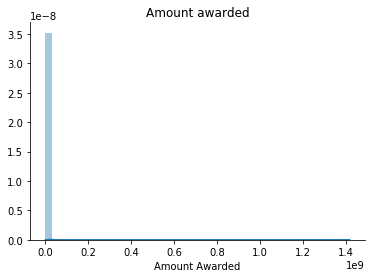

In [124]:
sns.distplot(data["Amount Awarded"])
sns.despine()
plt.title("Amount awarded")

Text(0.5,1,'Amount awarded > 0, log10')

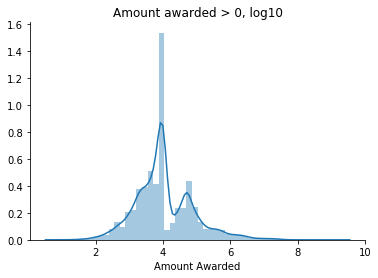

In [127]:
sns.distplot(data["Amount Awarded"][data["Amount Awarded"]>0].apply(np.log10))
sns.despine()
plt.title("Amount awarded > 0, log10")

In [133]:
4 ** 10

1048576

In [199]:
data[['Amount Applied For',
       'Amount Awarded']][data["Amount Applied For"] == 0].dropna().sort_values(by="Amount Awarded", ascending=False).head()

,Amount Applied For,Amount Awarded
3120,0.0,5000.0
3023,0.0,2500.0
3820,0.0,1500.0
1534,0.0,1380.0
4122,0.0,850.0


In [193]:
dataAppliedAwarded = data[['Amount Applied For',
       'Amount Awarded', 'Amount Disbursed']].dropna()

In [201]:
dataAppliedAwarded[dataAppliedAwarded["Amount Disbursed"] > dataAppliedAwarded["Amount Awarded"]]

,Amount Applied For,Amount Awarded,Amount Disbursed


In [202]:
dataAppliedAwarded[dataAppliedAwarded["Amount Disbursed"] < dataAppliedAwarded["Amount Awarded"]]

,Amount Applied For,Amount Awarded,Amount Disbursed
1120,120000.0,120000.0,80000.0
1121,120000.0,120000.0,80000.0
1122,120000.0,120000.0,40000.0


In [191]:
data.columns

Index(['Identifier', 'Title', 'Description', 'Currency', 'Amount Applied For',
       'Amount Awarded', 'Amount Disbursed', 'Award Date', 'URL',
       'Planned Dates:Start Date', 'Planned Dates:End Date',
       'Planned Dates:Duration (months)', 'Actual Dates:Start Date',
       'Actual Dates:End Date', 'Actual Dates:Duration (months)',
       'Recipient Org:Identifier', 'Recipient Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code', 'Funding Org:Identifier',
       'Funding Org:Name', 'Funding Org:Postal Code', 'Grant Programme:Code',
       'Grant Programme:Title', 'Grant Programme:URL', 'From An Open Call?',
       'Data Source', 'Publisher:Name', 'Recipient Region',
       'Recipient District', 'Recipient District Geographic Code',
       'Recipient Ward', 'Recipient Ward Geographic Code'],
      dtype='object')

In [165]:
#dataAppliedAwarded = dataAppliedAwarded.apply(np.log)

In [167]:
#g = sns.PairGrid(data=dataAppliedAwarded)
#g = g.map(sns.kdeplot)

Text(0.5,1,'Amount applied for (log10 scale)')

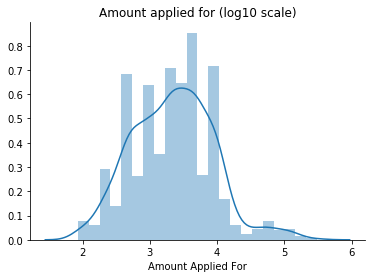

In [168]:
sns.distplot(data["Amount Applied For"][data["Amount Applied For"] > 0].apply(np.log10))
sns.despine()
plt.title("Amount applied for (log10 scale)")

In [170]:
#data[data["Recipient Org:Identifier"] == "6825798"]["Recipient Org:Name"]

In [171]:
data["Recipient Org:Identifier"].value_counts().head()

6825798        45
8248833        41
GB435757819    12
GGIS_ID_296     9
GB464644528     9
Name: Recipient Org:Identifier, dtype: int64